In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42
)

In [20]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:

model_no_aug = build_cnn_model()
history_no_aug = model_no_aug.fit(x_train, y_train,
                                  batch_size=64,
                                  epochs=10,
                                  validation_data=(x_val, y_val),
                                  shuffle=True,
                                  verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3255 - loss: 1.8248 - val_accuracy: 0.5464 - val_loss: 1.2416
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5729 - loss: 1.2016 - val_accuracy: 0.6551 - val_loss: 0.9799
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6550 - loss: 0.9802 - val_accuracy: 0.7123 - val_loss: 0.8236
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7004 - loss: 0.8551 - val_accuracy: 0.7165 - val_loss: 0.8143
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7264 - loss: 0.7779 - val_accuracy: 0.7398 - val_loss: 0.7402
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7471 - loss: 0.7205 - val_accuracy: 0.7561 - val_loss: 0.6982
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7686 - loss: 0.6593 - val_accuracy: 0.7571 - val_loss: 0.6972
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7799 - loss: 0.6249 - val_accuracy: 0

In [31]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.10,
    fill_mode='nearest'
)
train_generator = datagen.flow(x_train, y_train, batch_size=64)

model_with_aug=build_cnn_model()

history_with_aug  = model_with_aug.fit(train_generator,
                                      steps_per_epoch=len(x_train) // 64,
                                      epochs=10,
                                      validation_data=(x_val, y_val),
                                      shuffle=True,
                                      verbose=1)




Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.2983 - loss: 1.8837 - val_accuracy: 0.5050 - val_loss: 1.3649
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.4875 - loss: 1.4028 - val_accuracy: 0.5914 - val_loss: 1.1442
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.5500 - loss: 1.2370 - val_accuracy: 0.6427 - val_loss: 1.0101
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5919 - loss: 1.1463 - val_accuracy: 0.6613 - val_loss: 0.9586
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6204 - loss: 1.0723 - val_accuracy: 0.6965 - val_loss: 0.8513
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.6423 - loss: 1.0167 - val_accuracy: 0.6978 - val_loss: 0.8603
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6511 - loss: 0.9992 - val_accuracy: 0.7060 - val_loss: 0.8453
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6677 - loss: 0.9474 - 

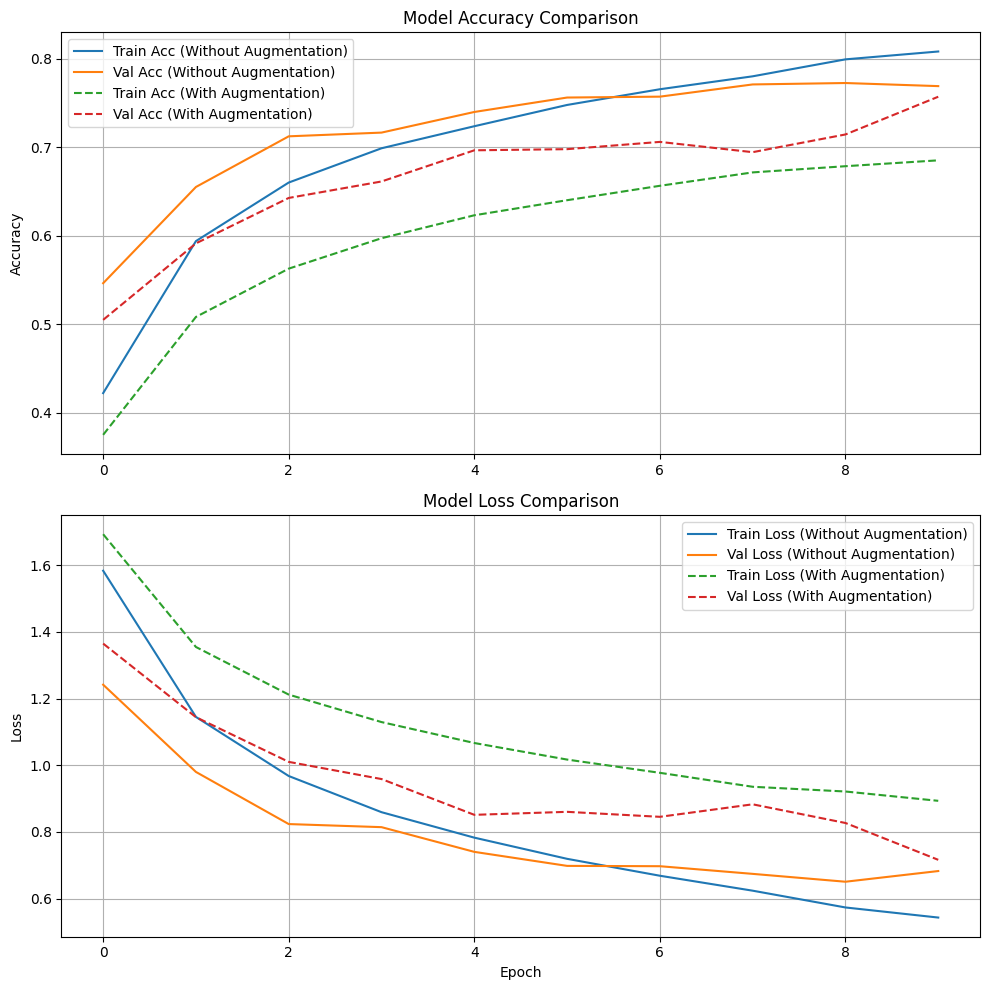

In [32]:
def plot_history(history1, history2, title1="Without Augmentation", title2="With Augmentation"):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    # Plot accuracy
    ax1.plot(history1.history['accuracy'], label=f'Train Acc ({title1})')
    ax1.plot(history1.history['val_accuracy'], label=f'Val Acc ({title1})')
    ax1.plot(history2.history['accuracy'], label=f'Train Acc ({title2})', linestyle='--')
    ax1.plot(history2.history['val_accuracy'], label=f'Val Acc ({title2})', linestyle='--')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Model Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history1.history['loss'], label=f'Train Loss ({title1})')
    ax2.plot(history1.history['val_loss'], label=f'Val Loss ({title1})')
    ax2.plot(history2.history['loss'], label=f'Train Loss ({title2})', linestyle='--')
    ax2.plot(history2.history['val_loss'], label=f'Val Loss ({title2})', linestyle='--')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.set_title('Model Loss Comparison')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history_no_aug, history_with_aug)

In [33]:

test_acc_no_aug = model_no_aug.evaluate(x_test, y_test, verbose=0)[1]
test_acc_aug = model_with_aug.evaluate(x_test, y_test, verbose=0)[1]

print(f"🔵 Final Test Accuracy (No Aug):     {test_acc_no_aug:.4f}")
print(f"🟢 Final Test Accuracy (With Aug):  {test_acc_aug:.4f}")


🔵 Final Test Accuracy (No Aug):     0.7632
🟢 Final Test Accuracy (With Aug):  0.7528
